In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_linnerud
lin = load_linnerud()
lin.data.shape

(20, 3)

In [3]:
print(lin.data)

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


In [4]:
lin_data=pd.DataFrame(data=lin.data, columns=lin.feature_names)
lin_data.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [5]:
lin_data.describe()

,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


In [6]:
print(lin.target)

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


In [7]:
print(lin.target_names)

['Weight', 'Waist', 'Pulse']


In [8]:
print (type(lin.data))
print (type(lin.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
X=lin.data
y=lin.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 3)
(8, 3)
(12, 3)
(8, 3)


In [26]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics

model = MultiOutputRegressor(Ridge(random_state=1)).fit(X_train,y_train)
print(model.score(X_train,y_train))

0.43649843581401404


In [50]:
y_pred = model.predict(X_test)
y_pred

array([[183.70305459,  35.65171046,  56.09856434],
       [192.71099243,  37.45868631,  54.52505193],
       [185.94731813,  36.25224697,  55.53900758],
       [179.68255327,  34.73016568,  56.93174121]])

In [18]:
df1 = pd.DataFrame(X, columns=["weight","waist","pulse"])
print(df1)

    weight  waist  pulse
0      5.0  162.0   60.0
1      2.0  110.0   60.0
2     12.0  101.0  101.0
3     12.0  105.0   37.0
4     13.0  155.0   58.0
5      4.0  101.0   42.0
6      8.0  101.0   38.0
7      6.0  125.0   40.0
8     15.0  200.0   40.0
9     17.0  251.0  250.0
10    17.0  120.0   38.0
11    13.0  210.0  115.0
12    14.0  215.0  105.0
13     1.0   50.0   50.0
14     6.0   70.0   31.0
15    12.0  210.0  120.0
16     4.0   60.0   25.0
17    11.0  230.0   80.0
18    15.0  225.0   73.0
19     2.0  110.0   43.0


In [19]:
df2 = pd.DataFrame(y, columns=["chins","situps","jumps"])
print(df2)

    chins  situps  jumps
0   191.0    36.0   50.0
1   189.0    37.0   52.0
2   193.0    38.0   58.0
3   162.0    35.0   62.0
4   189.0    35.0   46.0
5   182.0    36.0   56.0
6   211.0    38.0   56.0
7   167.0    34.0   60.0
8   176.0    31.0   74.0
9   154.0    33.0   56.0
10  169.0    34.0   50.0
11  166.0    33.0   52.0
12  154.0    34.0   64.0
13  247.0    46.0   50.0
14  193.0    36.0   46.0
15  202.0    37.0   62.0
16  176.0    37.0   54.0
17  157.0    32.0   52.0
18  156.0    33.0   54.0
19  138.0    33.0   68.0


In [20]:
df=pd.merge(df1,df2, left_index=True, right_index=True)
df

,weight,waist,pulse,chins,situps,jumps
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


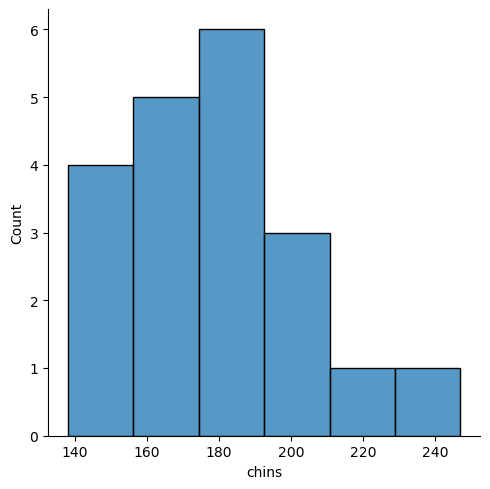

In [23]:
sns.displot(df['chins'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


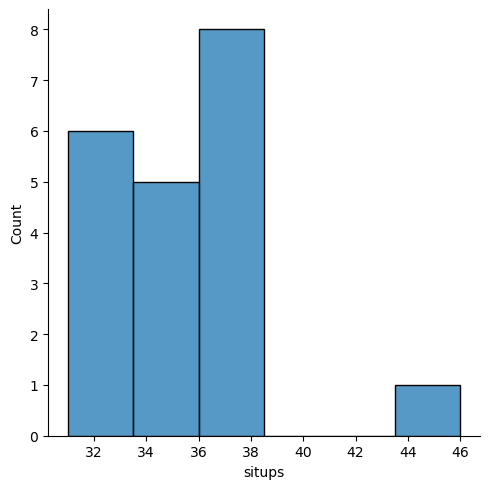

In [29]:
sns.displot(df['situps'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


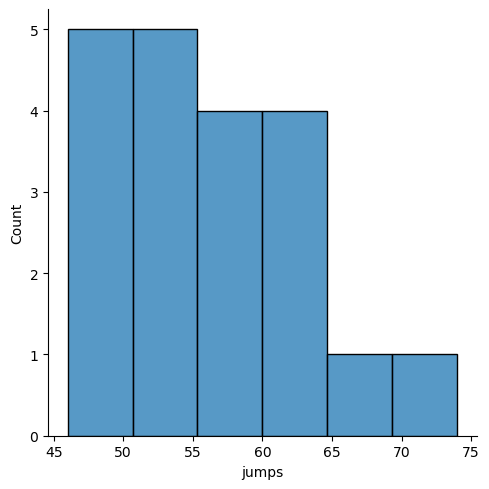

In [37]:
sns.displot(df['jumps'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


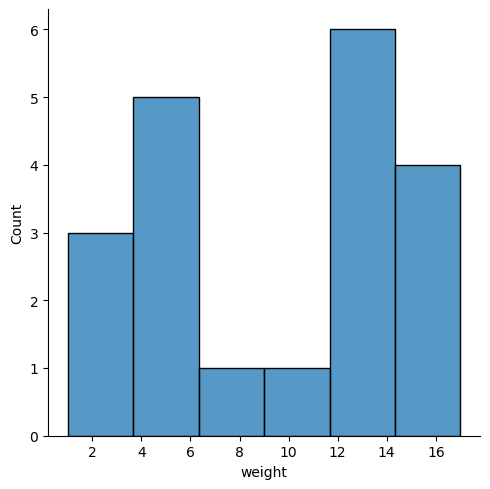

In [38]:
sns.displot(df['weight'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


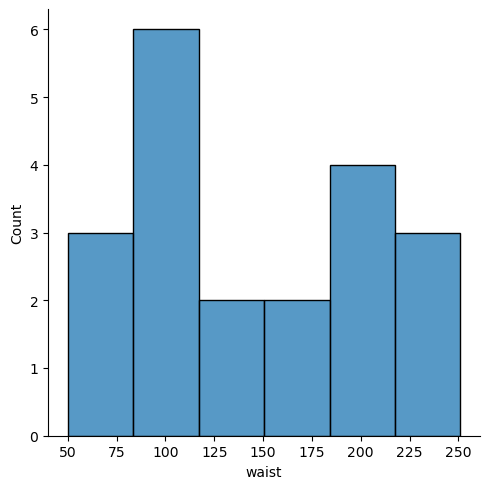

In [39]:
sns.displot(df['waist'])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


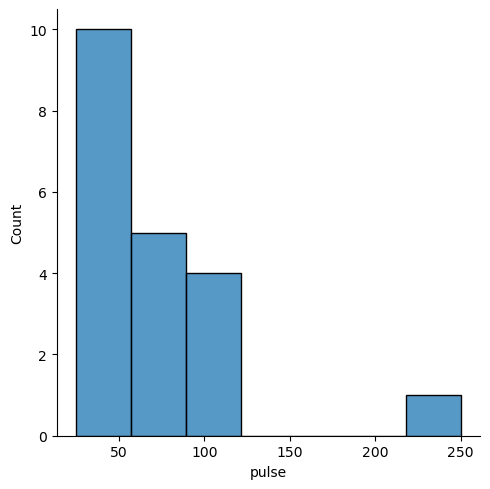

In [40]:
sns.displot(df['pulse'])

In [41]:
y=df[['chins','situps','jumps']]
X=df[['weight','waist','pulse']]

In [42]:
X=(X-X.min())/(X.max() - X.min())
X

,weight,waist,pulse
0,0.2500,0.557214,0.155556
1,0.0625,0.298507,0.155556
2,0.6875,0.253731,0.337778
3,0.6875,0.273632,0.053333
4,0.7500,0.522388,0.146667
5,0.1875,0.253731,0.075556
6,0.4375,0.253731,0.057778
7,0.3125,0.373134,0.066667
8,0.8750,0.746269,0.066667
9,1.0000,1.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 3)
(4, 3)
(16, 3)
(4, 3)


In [48]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics

model = MultiOutputRegressor(Ridge(random_state=1)).fit(X_train,y_train)
print(model.score(X_train,y_train))

0.2508382384061478


In [49]:
y_pred = model.predict(X_test)
y_pred

array([[183.70305459,  35.65171046,  56.09856434],
       [192.71099243,  37.45868631,  54.52505193],
       [185.94731813,  36.25224697,  55.53900758],
       [179.68255327,  34.73016568,  56.93174121]])